# <font color=red>Lab1: Framing</font>

***Load Audio Data***

In [1]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

In [2]:
record_path = 'mining_record.wav'
fs, data = read(record_path)

In [3]:
fs

8000

In [4]:
data.shape

(23970, 2)

***Read Channel Data***

In [5]:
data_left = data[:,0]
data_right = data[:,1]

N = data_left.size
ts = 1/fs
t_vector = np.arange(N)*ts

***Plot Data***

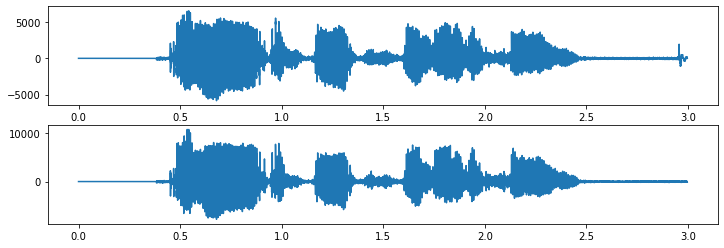

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(t_vector, data_left)

plt.subplot(2,1,2)
plt.plot(t_vector, data_right)

plt.show()

***Implementing Framing Function***

<function matplotlib.pyplot.show(close=None, block=None)>

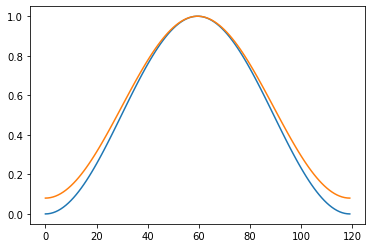

In [7]:
plt.plot(np.hanning(120))
plt.plot(np.hamming(120))
plt.show

In [8]:
# def Hanning_or_Hamming(hann_or_hamm_frame, original_frame):
#     framed = np.zeros_like(original_frame)
#     for i in range(hann_or_hamm_frame.shape[0]):
#         if original_frame[i] >= hann_or_hamm_frame[i]:
#             framed[i] = hann_or_hamm_frame[i]
#         else:
#             framed[i] = original_frame[i]            
#     return framed

def framing(Audio_File_Path, Frame_Size_in_Seconds, Overlap_Size_in_Seconds=0, Window_Type="Rectangle"):
    frames = []
    if Overlap_Size_in_Seconds > Frame_Size_in_Seconds:
        print("Error, Overlap size must be less than Frame size!!!")
        return frames
    elif Frame_Size_in_Seconds == 0:
        print("Error, Frame size should be greater than zero!!!")
        return frames
    
    Fs, data = read(Audio_File_Path)
    data_right = data[:,1]
    
    # compute frame length and frame step (convert from seconds to samples)
    Frame_Size_In_Samples = Frame_Size_in_Seconds * Fs
    Audio_Length = data_right.size
    Overlap_In_Samples = Overlap_Size_in_Seconds * fs
    Frame_Shift_In_Samples = Frame_Size_In_Samples - Overlap_In_Samples
    
    # Make sure that we have at least 1 frame
    if Frame_Size_in_Seconds != Overlap_Size_in_Seconds:
        num_frames = np.abs(Audio_Length - Frame_Size_In_Samples) // np.abs(Frame_Shift_In_Samples)
        rest_samples = np.abs(Audio_Length - Frame_Size_In_Samples) % np.abs(Frame_Shift_In_Samples)
    else:
        num_frames = 1
        rest_samples = 0
        
    # Pad Signal to make sure that all frames have equal number of samples
    # without truncating any samples from the original signal
    if rest_samples != 0:
        pad_signal_length = int(rest_samples)
        z = np.zeros(pad_signal_length)
        pad_signal = np.append(data_right, z)
        num_frames += 1
    else:
        pad_signal = data_right
        
    # make sure to use integers as indices
    frame_length = int(Frame_Size_In_Samples)
    frame_shift = int(Frame_Shift_In_Samples)
    num_frames = int(num_frames)
    
    # compute indices
    idx1 = np.tile(np.arange(0, frame_length), (num_frames, 1))
    if Frame_Size_in_Seconds == Overlap_Size_in_Seconds:
        idx2 = np.tile(np.arange(0, num_frames),(frame_length, 1)).T
    else:
        idx2 = np.tile(np.arange(0, num_frames * frame_shift, frame_shift),(frame_length, 1)).T
    indices = idx1 + idx2
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    
    if Window_Type == "Rectangle":
        return frames
        
    elif Window_Type == "Hanning":
        hann_frame = np.hanning(frames.shape[1])
        hanned_frames = []
        for frame in frames:
            hanned_frames.append(hann_frame * frame)
        hanned_frames = np.array(hanned_frames)
        return hanned_frames
    
    elif Window_Type == "Hamming":
        hamm_frame = np.hamming(frames.shape[1])
        hammed_frames = []
        for frame in frames:
            hammed_frames.append(hamm_frame * frame)
        hammed_frames = np.array(hammed_frames)
        return hammed_frames
    
    else:
        print("Error, Window type should be one of the following windows: {Rectangle, Hanning, Hamming}")
        return []

In [20]:
frame_size = 0.020
overlab_size = 0.010
Rec_frames = framing(record_path, frame_size, overlab_size)
hanning_frames = framing(record_path, frame_size, overlab_size, "Hanning")
hamming_frames = framing(record_path, frame_size, overlab_size, "Hamming")
Rec_frames.shape

(298, 160)

In [21]:
x, y = Rec_frames.shape

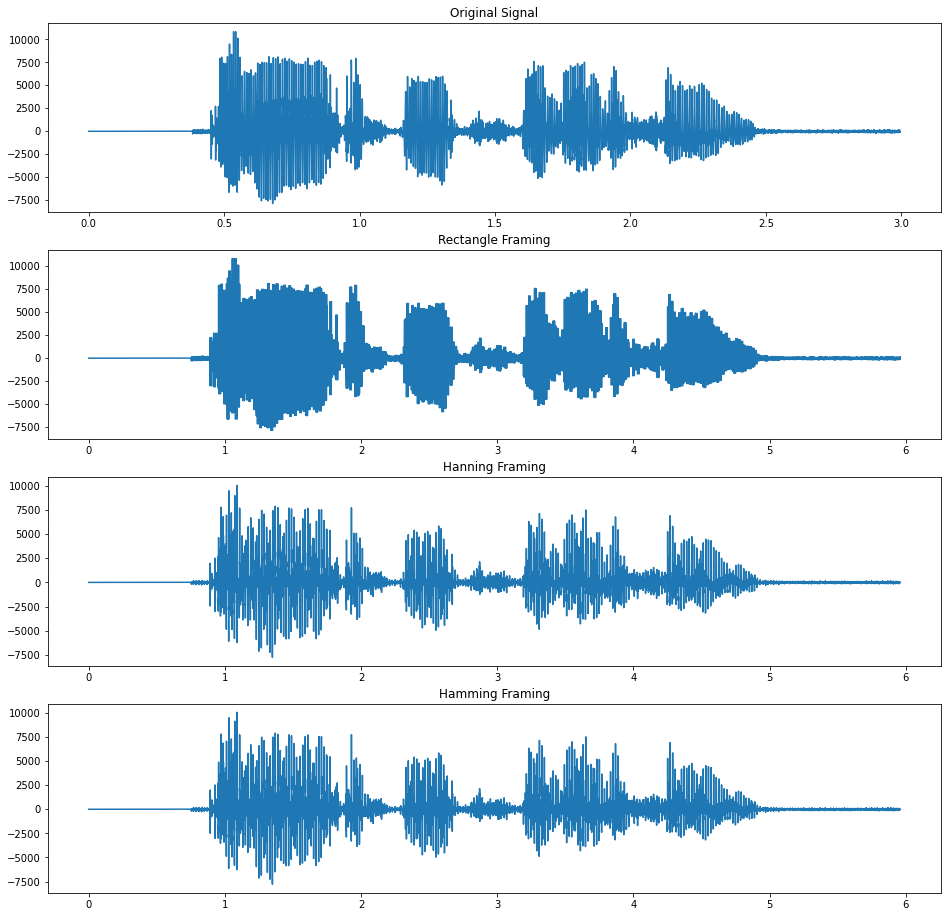

In [22]:
t_vector2 = np.arange(x*y)*ts
plt.figure(figsize=(16,16))

plt.subplot(4,1,1)
plt.title("Original Signal")
plt.plot(t_vector, data_right)

plt.subplot(4,1,2)
plt.title("Rectangle Framing")
plt.plot(t_vector2, Rec_frames.reshape(x*y,1))

plt.subplot(4,1,3)
plt.title("Hanning Framing")
plt.plot(t_vector2, hanning_frames.reshape(x*y,1))

plt.subplot(4,1,4)
plt.title("Hamming Framing")
plt.plot(t_vector2, hamming_frames.reshape(x*y,1))

plt.show()

# <font color=red>Lab2: Computation of Energy & Zero Crossing</font>

In [12]:
def Get_Eenergies(frames):
    energies = []
    for frame in frames:
        sum_energies = 0
        for i in range(len(frame)):
            sum_energies += frame[i]**2
        energies.append(sum_energies)
    return np.array(energies)

In [13]:
my_energies = Get_Eenergies(framing(record_path, frame_size, overlab_size))
my_energies.shape

(398,)

In [14]:
def Get_Zero_Crossings(frames):
    Zero_Crossings = []
    for frame in frames:
        Num_of_Zero_Crossings = 0
        for i in range(len(frame)-1):
            if (frame[i] * frame[i+1]) < 0:
                Num_of_Zero_Crossings += 1
        Zero_Crossings.append(Num_of_Zero_Crossings)
    return np.array(Zero_Crossings)

In [15]:
Zero_Crossings = Get_Zero_Crossings(framing(record_path, frame_size, overlab_size))
Zero_Crossings.shape

(398,)

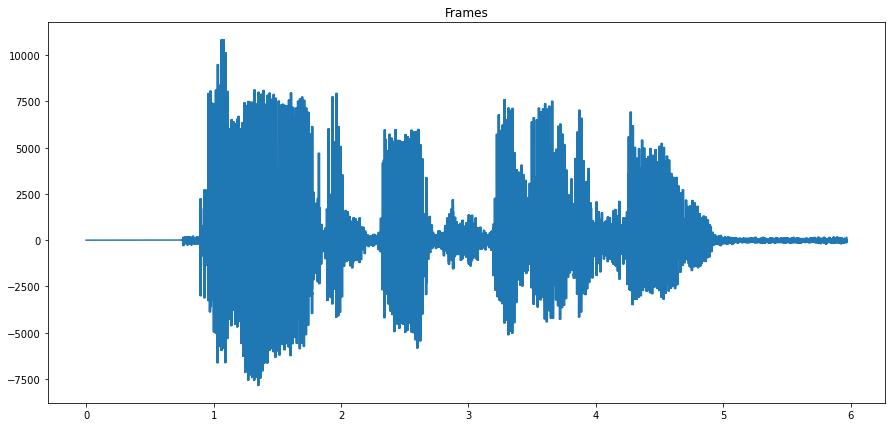

<function matplotlib.pyplot.show(close=None, block=None)>

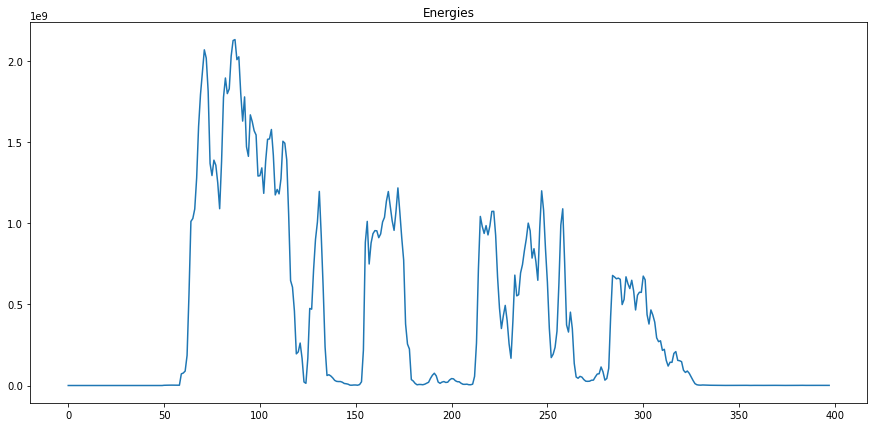

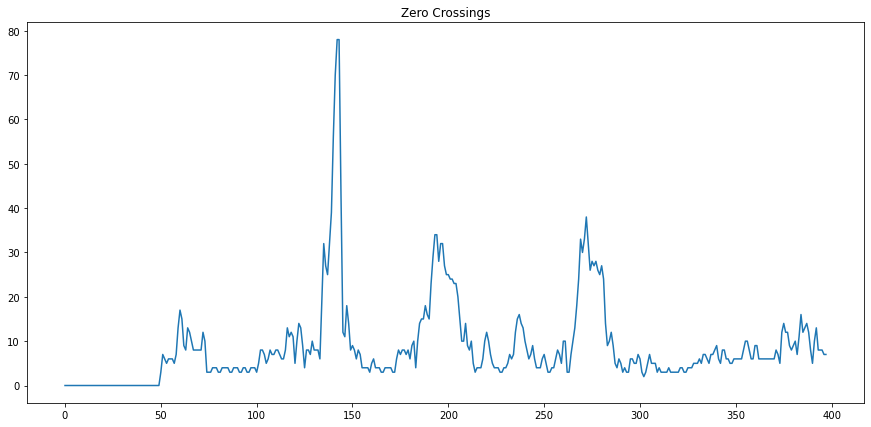

In [16]:
plt.figure(figsize=(15,7))
plt.plot(t_vector2,Rec_frames.reshape(x*y,1))
plt.title("Frames")
plt.show()

plt.figure(figsize=(15,7))
plt.plot(my_energies)
plt.title("Energies")
plt.show

plt.figure(figsize=(15,7))
plt.plot(Zero_Crossings)
plt.title("Zero Crossings")
plt.show